<a href="https://colab.research.google.com/github/GaneshKolt/AWS-INFRA-AUTOMATION/blob/master/GotIt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install utils
!pip install opencv-python
!pip install tensorflow-gpu
!apt-get install -qq protobuf-compiler python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive
!pip install -q pycocotools

In [2]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30761 (delta 0), reused 3 (delta 0), pack-reused 30758
Receiving objects: 100% (30761/30761), 510.56 MiB | 31.44 MiB/s, done.
Resolving deltas: 100% (19342/19342), done.
Checking out files: 100% (3078/3078), done.


In [40]:
%cd /content/models/research

/content/models/research


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

In [10]:
%cd /content/models/research

/content/models/research


In [11]:
!python3 setup.py build

running build
running build_py
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'


In [12]:
!python3 setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/eval_util_test.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/inference/infer_detections.py -> build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/inference/detection_inference.py -> build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/

In [18]:
%cd /content

/content


In [19]:
!unzip object-detection.zip

Archive:  object-detection.zip
   creating: object-detection/data/
  inflating: object-detection/data/test_labels.csv  
  inflating: object-detection/data/train_labels.csv  
  inflating: object-detection/generate_tfrecord.py  
   creating: object-detection/images/
   creating: object-detection/images/test/
  inflating: object-detection/images/test/1.jpeg  
  inflating: object-detection/images/test/1.xml  
  inflating: object-detection/images/test/11.jpeg  
  inflating: object-detection/images/test/11.xml  
  inflating: object-detection/images/test/13.jpeg  
  inflating: object-detection/images/test/13.xml  
  inflating: object-detection/images/test/15.jpeg  
  inflating: object-detection/images/test/15.xml  
  inflating: object-detection/images/test/17.jpeg  
  inflating: object-detection/images/test/17.xml  
  inflating: object-detection/images/test/19.jpeg  
  inflating: object-detection/images/test/19.xml  
  inflating: object-detection/images/test/21.jpeg  
  inflating: object-dete

In [20]:
%cd /content/object-detection

/content/object-detection


In [21]:
!python3 generate_tfrecord.py --csv_input=data/train_labels.csv --output_path=data/train.record --image_dir=images/train



W0918 23:41:11.274803 140350109427584 deprecation_wrapper.py:119] From generate_tfrecord.py:86: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0918 23:41:11.401608 140350109427584 deprecation_wrapper.py:119] From generate_tfrecord.py:45: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object-detection/data/train.record


In [23]:
!python3 generate_tfrecord.py --csv_input=data/test_labels.csv --output_path=data/test.record --image_dir=images/test



W0918 23:42:04.890307 139921143637888 deprecation_wrapper.py:119] From generate_tfrecord.py:86: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0918 23:42:04.910877 139921143637888 deprecation_wrapper.py:119] From generate_tfrecord.py:45: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object-detection/data/test.record


In [24]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvzf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!rm -rf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-09-18 23:42:12--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.15.128, 2a00:1450:400c:c0c::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.15.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  85.5MB/s    in 1.7s    

2019-09-18 23:42:14 (85.5 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/mod

In [25]:
!cp -avr /content/object-detection/data /content/models/research/object_detection
!cp -avr /content/object-detection/training /content/models/research/object_detection
!cp -avr /content/object-detection/images /content/models/research/object_detection
!cp -avr /content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28 /content/models/research/object_detection

'/content/object-detection/data/test_labels.csv' -> '/content/models/research/object_detection/data/test_labels.csv'
'/content/object-detection/data/train_labels.csv' -> '/content/models/research/object_detection/data/train_labels.csv'
'/content/object-detection/data/train.record' -> '/content/models/research/object_detection/data/train.record'
'/content/object-detection/data/test.record' -> '/content/models/research/object_detection/data/test.record'
'/content/object-detection/training' -> '/content/models/research/object_detection/training'
'/content/object-detection/training/faster_rcnn_inception_v2_coco.config' -> '/content/models/research/object_detection/training/faster_rcnn_inception_v2_coco.config'
'/content/object-detection/training/object-detection.pbtxt' -> '/content/models/research/object_detection/training/object-detection.pbtxt'
'/content/object-detection/images' -> '/content/models/research/object_detection/images'
'/content/object-detection/images/test' -> '/content/mod

In [35]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


In [34]:
!python3 export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path training/faster_rcnn_inception_v2_coco.config \
    --trained_checkpoint_prefix training/model.ckpt-18004 \
    --output_directory loki_3.0_model





W0919 04:36:31.048479 140140804421504 deprecation_wrapper.py:119] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0919 04:36:31.054388 140140804421504 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0919 04:36:31.054684 140140804421504 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:113: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0919 04:36:31.102318 140140804421504 deprecation_wrapper.py:119] From /content/models/research/object_detection/core/preprocessor.py:2412: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.


W0919 04:36:31.173869 140140804421504 deprecation_wrapper.py:119] From /content/models/research/object_detection/meta_architectures/faster_rcnn_meta_arch.py:16

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

In [0]:
%matplotlib inline

In [0]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [0]:
MODEL_NAME = 'loki_3.0_model'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [42]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [0]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpeg'.format(i)) for i in range(1, 5) ]
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

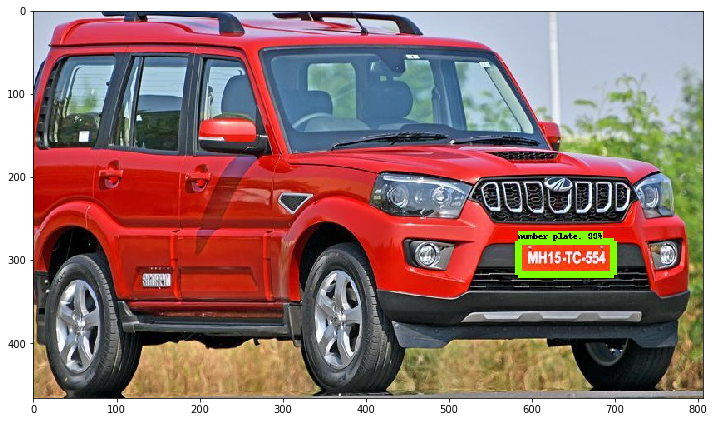

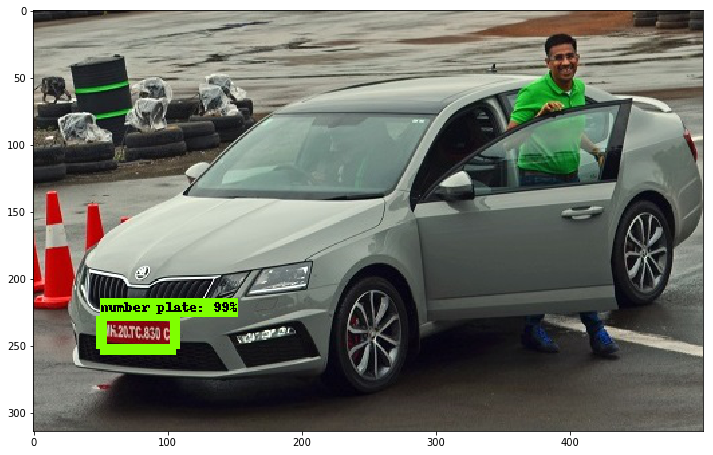

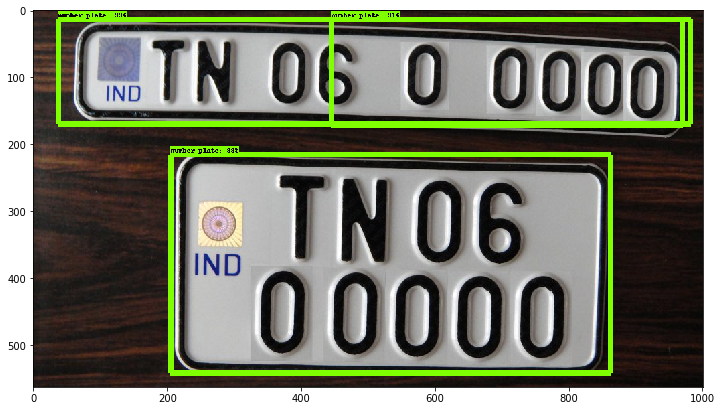

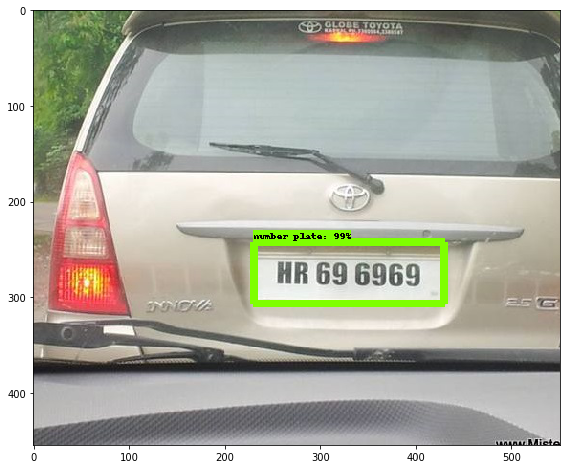

In [53]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)